**01. LOGISTIC REGRESSION WEIGHT UPDATE PROCESS**

1. Use the code given in listing 1 to generate data.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[ -5, 0] , [0, 1.5]]
X , y = make_blobs ( n_samples = 1000 , centers = centers , random_state = 40)
transformation = [[0.4, 0.2] , [-0.4, 1.2]]
X = np.dot(X ,transformation)

# Add a bias term to the feature matrix
X = np.c_[ np.ones(( X.shape[0], 1)), X ]

# Define the logistic sigmoid function
def sigmoid(z) :
    return 1/(1 + np.exp(-z))

# Define the logistic loss ( binary cross - entropy )function
def log_loss ( y_true , y_pred ) :
    epsilon = 1e-15
    y_pred = np.clip ( y_pred, epsilon,  1 - epsilon ) # Clip to avoid log (0)
    return -(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))

# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10

#losses from gradient descent method
loss_history_GD = []


2. Initializing weights as zeros, perform gradient descent based weight update for the given data. Here, use binary cross entropy as a loss function. Further, use learning rate as α = 0.1 and number of iterations as t = 10. Batch Gradient descent weight update is given.

    Here, X is data matrix of dimension of N × (D + 1). Here, N is total number of data samples and D is number of features. X is given.

In [107]:
# Initialize coefficients
W_GD = np.zeros( X.shape[1])

# Perform gradient descent and track the losses
for i in range(iterations):

    # predicted values using the current weights
    y_pred = sigmoid(np.dot(X, W_GD))
    
    # gradient of the loss with current weights
    gradient = np.dot(X.T, (y_pred - y)) / len(y)
    
    # update weights 
    W_GD = W_GD - learning_rate * gradient

    # binary cross-entropy loss function
    loss_GD = np.mean(log_loss(y, y_pred))
    loss_history_GD.append(loss_GD)

print(f"Loss Histroy : {loss_history_GD}")
print(f"Final Weights after gradient descent: {W}")


Loss Histroy : [0.6931471805599454, 0.6328211522065751, 0.5823972949578101, 0.5400400231011129, 0.5042051102371915, 0.4736389534183553, 0.44734329598374695, 0.4245298511469433, 0.4045770169455826, 0.38699321002389653]
Final Weights after gradient descent: [0.01387454 0.01276388 0.00604143]


3. Plot the loss with respect to number of iterations.

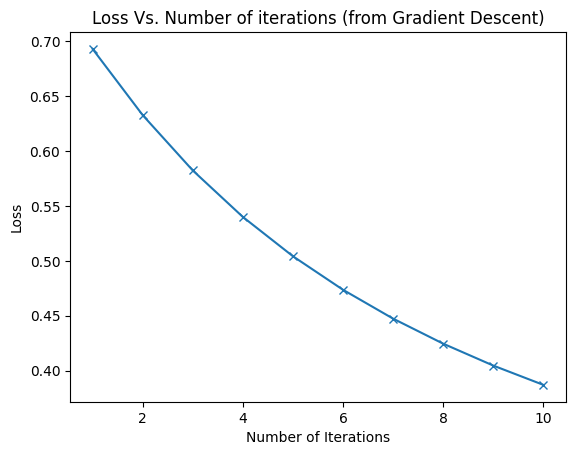

In [105]:
plt.plot(range(1, iterations + 1), loss_history_GD, marker='x')
plt.title('Loss Vs. Number of iterations (from Gradient Descent)')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

4. Initializing weights as zeros, perform Newton’s method weight update for the given data. Here, use binary cross entropy as a loss function. Further, set number of iterations as t = 10. Batch Newton’s method weight update and S is given.

In [108]:
# Initialize weights as zeros
W_NM = np.zeros(X.shape[1])

#losses from Newton's method
loss_history_NM = []

# Perform Newton's method
for i in range(iterations):
                        
    # Calculate the predicted values using the current weights
    y_pred = sigmoid(np.dot(X, W_NM))
    
    # Calculate S, the diagonal matrix
    S = np.diag(y_pred * (1 - y_pred))
    
    # Calculate the Hessian matrix
    Hessian = np.dot(X.T, np.dot(S, X))
    
    # Calculate the gradient of the loss with respect to weights
    gradient = np.dot(X.T, (y_pred - y)) / len(y)
    
    # Update weights using Newton's method formula
    W_NM = W_NM - learning_rate * np.linalg.inv(Hessian).dot(gradient)

    # binary cross-entropy loss function
    loss_NM = np.mean(log_loss(y, y_pred))
    loss_history_NM.append(loss_NM)

print(f"Loss Histroy : {loss_history_NM}")
print(f"Final weights after Newton's method {W_NM}")

Loss Histroy : [0.6931471805599454, 0.6930605868208546, 0.692974010398522, 0.6928874512872387, 0.6928009094812978, 0.6927143849749955, 0.6926278777626309, 0.6925413878385054, 0.6924549151969233, 0.6923684598321916]
Final weights after Newton's method [0.00139303 0.00128152 0.00060657]


5. Plot the loss with respect to number of iterations.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


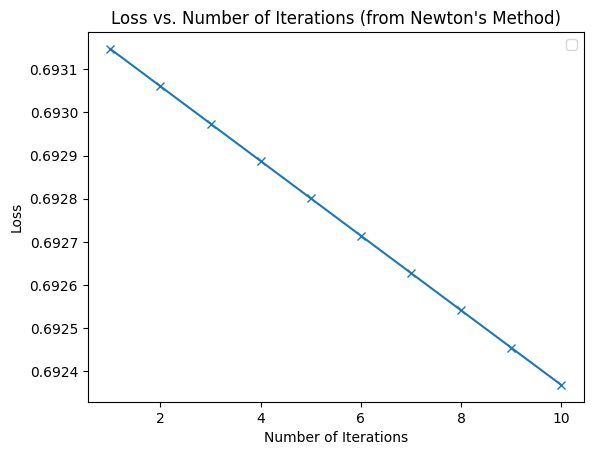

In [100]:
plt.plot(range(1, iterations+1), loss_history_NM, marker='x')
plt.title('Loss vs. Number of Iterations (from Newton\'s Method)')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


6. Plot the loss with respect to number of iterations for both Gradient descent and Newton method’s in a single plot. Comment on your results.


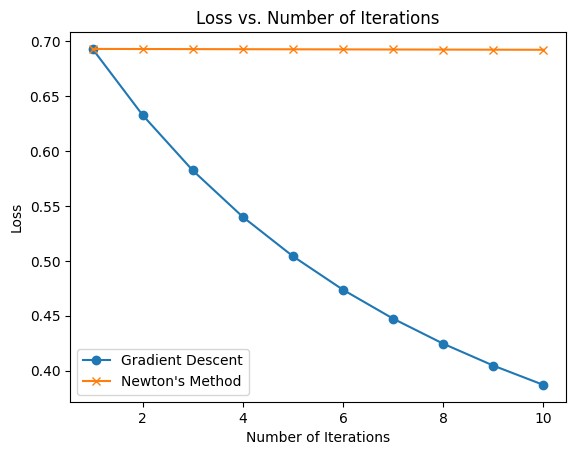

In [101]:
# Plot the loss vs. number of iterations for both methods
plt.plot(range(1, iterations+1), loss_history_GD, marker='o', label="Gradient Descent")
plt.plot(range(1, iterations+1), loss_history_NM, marker='x', label="Newton's Method")
plt.title('Loss vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
